In [156]:
import pandas as pd

In [157]:
# df = pd.read_csv("./Data2/2020-2021.csv")

In [158]:
# df

In [159]:
import os

path = "./Data2/"
dir_list = os.listdir(path)
allData = [file for file in dir_list if "-" in file and ".csv" in file]
allData.remove("2000-2001.csv")
df = pd.DataFrame()

for file in allData:
    pathFile = os.path.join(path,file)
    data = pd.read_csv(pathFile,error_bad_lines=False)
    try:
        df = df.append(data[["HomeTeam","AwayTeam","FTR","B365H","B365D","B365A","Date"]])
    except:
        print(file)
df

b'Skipping line 337: expected 57 fields, saw 62\nSkipping line 338: expected 57 fields, saw 62\nSkipping line 339: expected 57 fields, saw 62\nSkipping line 340: expected 57 fields, saw 62\nSkipping line 341: expected 57 fields, saw 62\nSkipping line 342: expected 57 fields, saw 62\nSkipping line 343: expected 57 fields, saw 62\nSkipping line 344: expected 57 fields, saw 62\nSkipping line 345: expected 57 fields, saw 62\nSkipping line 346: expected 57 fields, saw 62\nSkipping line 347: expected 57 fields, saw 62\nSkipping line 348: expected 57 fields, saw 62\nSkipping line 349: expected 57 fields, saw 62\nSkipping line 350: expected 57 fields, saw 62\nSkipping line 351: expected 57 fields, saw 62\nSkipping line 352: expected 57 fields, saw 62\nSkipping line 353: expected 57 fields, saw 62\nSkipping line 354: expected 57 fields, saw 62\nSkipping line 355: expected 57 fields, saw 62\nSkipping line 356: expected 57 fields, saw 62\nSkipping line 357: expected 57 fields, saw 62\nSkipping li

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Date
0,Blackburn,Sunderland,D,1.727,3.25,4.333,17/08/2002
1,Charlton,Chelsea,A,2.800,3.25,2.200,17/08/2002
2,Everton,Tottenham,D,2.250,3.25,2.750,17/08/2002
3,Fulham,Bolton,H,1.727,3.25,4.333,17/08/2002
4,Leeds,Man City,H,1.667,3.40,4.500,17/08/2002
...,...,...,...,...,...,...,...
179,West Ham,West Brom,H,1.570,4.20,5.500,19/01/2021
180,Leicester,Chelsea,H,2.870,3.40,2.450,19/01/2021
181,Man City,Aston Villa,H,1.220,6.50,12.000,20/01/2021
182,Fulham,Man United,A,6.000,4.33,1.530,20/01/2021


In [160]:
df['Date']= pd.to_datetime(df['Date'])

In [161]:
df= df[["HomeTeam","AwayTeam","FTR","B365H","B365D","B365A","Date"]]
df

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Date
0,Blackburn,Sunderland,D,1.727,3.25,4.333,2002-08-17
1,Charlton,Chelsea,A,2.800,3.25,2.200,2002-08-17
2,Everton,Tottenham,D,2.250,3.25,2.750,2002-08-17
3,Fulham,Bolton,H,1.727,3.25,4.333,2002-08-17
4,Leeds,Man City,H,1.667,3.40,4.500,2002-08-17
...,...,...,...,...,...,...,...
179,West Ham,West Brom,H,1.570,4.20,5.500,2021-01-19
180,Leicester,Chelsea,H,2.870,3.40,2.450,2021-01-19
181,Man City,Aston Villa,H,1.220,6.50,12.000,2021-01-20
182,Fulham,Man United,A,6.000,4.33,1.530,2021-01-20


In [162]:
def addHighest(row):
    H = row["B365H"]
    D = row["B365D"]
    A = row["B365A"]
    
    bet = min([H,D,A])
    if bet == H:
        row["bet"] = "H"
    if bet == D:
        row["bet"] = "D"
    if bet == A:
        row["bet"] = "A"
        
    return row

df = df.apply(addHighest,axis = 1)
df

,AwayTeam,B365A,B365D,B365H,Date,FTR,HomeTeam,bet
0,Sunderland,4.333,3.25,1.727,2002-08-17,D,Blackburn,A
1,Chelsea,2.200,3.25,2.800,2002-08-17,A,Charlton,D
2,Tottenham,2.750,3.25,2.250,2002-08-17,D,Everton,D
3,Bolton,4.333,3.25,1.727,2002-08-17,H,Fulham,A
4,Man City,4.500,3.40,1.667,2002-08-17,H,Leeds,A
...,...,...,...,...,...,...,...,...
179,West Brom,5.500,4.20,1.570,2021-01-19,H,West Ham,A
180,Chelsea,2.450,3.40,2.870,2021-01-19,H,Leicester,D
181,Aston Villa,12.000,6.50,1.220,2021-01-20,H,Man City,A
182,Man United,1.530,4.33,6.000,2021-01-20,A,Fulham,H


In [163]:
def checkBet(row):
    if row["bet"] == row["FTR"]:
        row["result"] = 1
    else:
        row["result"] = 0
    return row

df = df.apply(checkBet,axis = 1)
df

,AwayTeam,B365A,B365D,B365H,Date,FTR,HomeTeam,bet,result
0,Sunderland,4.333,3.25,1.727,2002-08-17,D,Blackburn,A,0
1,Chelsea,2.200,3.25,2.800,2002-08-17,A,Charlton,D,0
2,Tottenham,2.750,3.25,2.250,2002-08-17,D,Everton,D,1
3,Bolton,4.333,3.25,1.727,2002-08-17,H,Fulham,A,0
4,Man City,4.500,3.40,1.667,2002-08-17,H,Leeds,A,0
...,...,...,...,...,...,...,...,...,...
179,West Brom,5.500,4.20,1.570,2021-01-19,H,West Ham,A,0
180,Chelsea,2.450,3.40,2.870,2021-01-19,H,Leicester,D,0
181,Aston Villa,12.000,6.50,1.220,2021-01-20,H,Man City,A,0
182,Man United,1.530,4.33,6.000,2021-01-20,A,Fulham,H,0


In [164]:
len(df[df["result"] == 0])

5835

In [165]:
len(df[df["result"] == 1])

1525

In [166]:
len(df[df["result"] == 1]) / ( len(df[df["result"] == 0]) + len(df[df["result"] == 1]))

0.20720108695652173

In [167]:
budgetPos = 0
temp= []
budgetNeg = 0
betAmount = 1
for index, row in df.iterrows():
    bet = row["bet"]

    if bet == "H":
        odd = row["B365H"]
    elif bet == "D":
        odd = row["B365D"]
    else:
        odd = row["B365A"]
        
    if row["result"] == 0:
        budgetNeg -= betAmount
        row["amount"] = -betAmount
    else:
        temp.append(row["result"] * float(odd)*betAmount- betAmount)
        row["amount"] = row["result"] * float(odd)*betAmount -betAmount
    

In [186]:
def addAmountGainAndExpectedValue(row):
    bet = row["bet"]

    if bet == "H":
        odd = row["B365H"]
    elif bet == "D":
        odd = row["B365D"]
    else:
        odd = row["B365A"]
        
    if row["result"] == 0:
        row["amount"] = -betAmount
    else:
        row["amount"] = row["result"] * float(odd)*betAmount -betAmount
    
    row["WinOdd"] = odd
    row["WinProbability"] = (1/odd)     
    row["LossProbability"] = 1 - (1/odd) 
#    one unit only
    row["ExpectedProfit"] = odd*1
    
    row["ExpectedValue"] = row["WinProbability"] *(row["ExpectedProfit"] -betAmount)  - row["LossProbability"]*betAmount
        
       
    return row

df = df.apply(addAmountGainAndExpectedValue,axis =1)
df

,AwayTeam,B365A,B365D,B365H,Date,FTR,HomeTeam,bet,result,amount,WinOdd,WinProbability,LossProbability,ExpectedProfit,ExpectedValue
0,Sunderland,4.333,3.25,1.727,2002-08-17,D,Blackburn,A,0,-1.00,4.333,0.230787,0.769213,4.333,-1.110223e-16
1,Chelsea,2.200,3.25,2.800,2002-08-17,A,Charlton,D,0,-1.00,3.250,0.307692,0.692308,3.250,0.000000e+00
2,Tottenham,2.750,3.25,2.250,2002-08-17,D,Everton,D,1,2.25,3.250,0.307692,0.692308,3.250,0.000000e+00
3,Bolton,4.333,3.25,1.727,2002-08-17,H,Fulham,A,0,-1.00,4.333,0.230787,0.769213,4.333,-1.110223e-16
4,Man City,4.500,3.40,1.667,2002-08-17,H,Leeds,A,0,-1.00,4.500,0.222222,0.777778,4.500,-1.110223e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,West Brom,5.500,4.20,1.570,2021-01-19,H,West Ham,A,0,-1.00,5.500,0.181818,0.818182,5.500,1.110223e-16
180,Chelsea,2.450,3.40,2.870,2021-01-19,H,Leicester,D,0,-1.00,3.400,0.294118,0.705882,3.400,1.110223e-16
181,Aston Villa,12.000,6.50,1.220,2021-01-20,H,Man City,A,0,-1.00,12.000,0.083333,0.916667,12.000,0.000000e+00
182,Man United,1.530,4.33,6.000,2021-01-20,A,Fulham,H,0,-1.00,6.000,0.166667,0.833333,6.000,-1.110223e-16


In [187]:
start_date = "2000-01-01"
end_date = "2021-12-31"
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df = df.loc[mask]
df

,AwayTeam,B365A,B365D,B365H,Date,FTR,HomeTeam,bet,result,amount,WinOdd,WinProbability,LossProbability,ExpectedProfit,ExpectedValue
0,Sunderland,4.333,3.25,1.727,2002-08-17,D,Blackburn,A,0,-1.00,4.333,0.230787,0.769213,4.333,-1.110223e-16
1,Chelsea,2.200,3.25,2.800,2002-08-17,A,Charlton,D,0,-1.00,3.250,0.307692,0.692308,3.250,0.000000e+00
2,Tottenham,2.750,3.25,2.250,2002-08-17,D,Everton,D,1,2.25,3.250,0.307692,0.692308,3.250,0.000000e+00
3,Bolton,4.333,3.25,1.727,2002-08-17,H,Fulham,A,0,-1.00,4.333,0.230787,0.769213,4.333,-1.110223e-16
4,Man City,4.500,3.40,1.667,2002-08-17,H,Leeds,A,0,-1.00,4.500,0.222222,0.777778,4.500,-1.110223e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,West Brom,5.500,4.20,1.570,2021-01-19,H,West Ham,A,0,-1.00,5.500,0.181818,0.818182,5.500,1.110223e-16
180,Chelsea,2.450,3.40,2.870,2021-01-19,H,Leicester,D,0,-1.00,3.400,0.294118,0.705882,3.400,1.110223e-16
181,Aston Villa,12.000,6.50,1.220,2021-01-20,H,Man City,A,0,-1.00,12.000,0.083333,0.916667,12.000,0.000000e+00
182,Man United,1.530,4.33,6.000,2021-01-20,A,Fulham,H,0,-1.00,6.000,0.166667,0.833333,6.000,-1.110223e-16


In [188]:
groupbydf = df.groupby("Date").sum()
groupbydf

,B365A,B365D,B365H,result,amount,WinOdd,WinProbability,LossProbability,ExpectedProfit,ExpectedValue
Date,,,,,,,,,,
2001-02-04,11.800,8.80,5.750,0,-2.0,14.50,0.322222,1.677778,14.50,-1.110223e-16
2001-05-04,30.050,24.88,15.760,2,0.0,33.63,1.658498,5.341502,33.63,2.220446e-16
2001-11-03,30.660,25.80,18.460,1,-2.5,37.90,1.424421,5.575579,37.90,0.000000e+00
2002-01-09,9.750,12.00,11.000,2,2.0,12.00,1.333333,2.666667,12.00,-4.440892e-16
2002-01-12,20.400,19.40,12.018,2,2.0,21.40,1.696429,4.303571,21.40,-2.220446e-16
...,...,...,...,...,...,...,...,...,...,...
2021-04-01,1.610,4.33,5.000,1,4.0,5.00,0.200000,0.800000,5.00,0.000000e+00
2021-09-03,6.200,6.50,4.300,0,-2.0,6.65,0.601810,1.398190,6.65,1.110223e-16
2021-10-03,2.600,3.20,2.500,0,-1.0,3.20,0.312500,0.687500,3.20,0.000000e+00


Mean  -0.32065589041095893
Std  4.3234644117514796


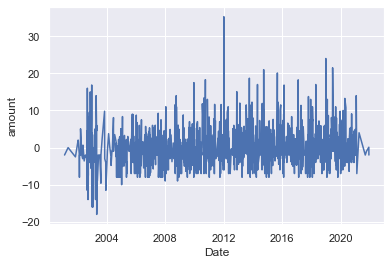

In [189]:
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.lineplot(x="Date", y="amount",data=groupbydf)

print("Mean " ,groupbydf.mean()["amount"])
print("Std " ,groupbydf.std()["amount"])

<AxesSubplot:xlabel='Date', ylabel='amount'>

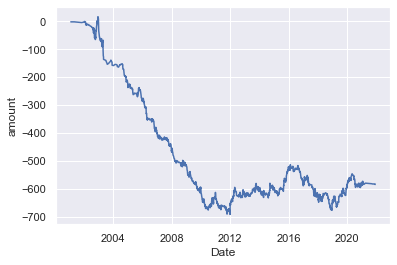

In [190]:
dfcum = df.groupby("Date").sum("amount")["amount"].cumsum(axis=0)

import seaborn as sns
sns.set_theme(style="darkgrid")

sns.lineplot(data=dfcum)

Mean  -0.32065589041095893
Std  4.3234644117514796


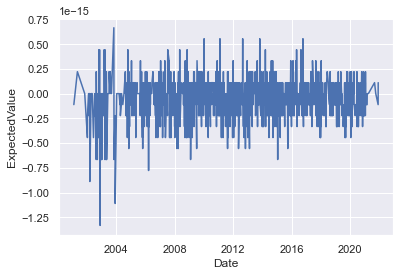

In [203]:
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.lineplot(x="Date", y="ExpectedValue",data=groupbydf)

print("Mean " ,groupbydf.mean()["amount"])
print("Std " ,groupbydf.std()["amount"])

<AxesSubplot:xlabel='Date', ylabel='ExpectedValue'>

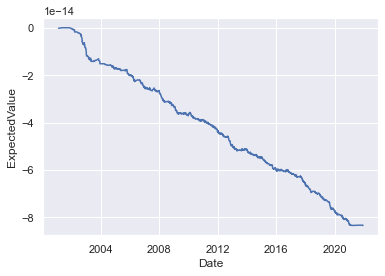

In [191]:
dfcum = df.groupby("Date").sum()["ExpectedValue"].cumsum(axis=0)

import seaborn as sns
sns.set_theme(style="darkgrid")

sns.lineplot(data=dfcum)

In [192]:
sum(df.groupby("Date").sum()["ExpectedValue"])

-8.326672684688674e-14

In [193]:
import numpy as np
budgetPos = np.nansum(temp)

In [194]:
budgetPos

5270.396000000001

In [195]:
budgetNeg

-5835

In [196]:
budgetPos + budgetNeg

-564.6039999999994

In [197]:
df['bet'].value_counts()

A    3931
D    1955
H    1345
Name: bet, dtype: int64

In [198]:
# -------------------------------------------------------------------------------------------------

In [199]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df["FTR"],df["bet"],labels = ["H","D","A"])

array([[ 280,  717, 2367],
       [ 284,  574,  930],
       [ 781,  664,  634]], dtype=int64)

In [200]:
df["FTR"].value_counts()

H    3364
A    2079
D    1788
Name: FTR, dtype: int64

In [201]:
# Post analsys 

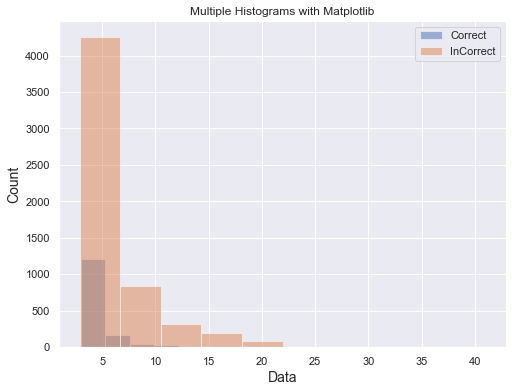

In [202]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8,6))
plt.hist(df[df["result"] == 1]["WinOdd"], alpha=0.5, label="Correct")
plt.hist(df[df["result"] == 0]["WinOdd"], alpha=0.5, label="InCorrect")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')